# Classification in Sklearn
In this tutorial, we will learn more about classifying data.

Here, we will load and benchmark (compare) a few algorithms for a multi-class classification problem.

More specifically, we'll have a look at the [polymers dataset](https://www.kaggle.com/datasets/victorsabanzagil/polymers) and we will try to classify the polymers based on their feature vector, which is a numerical representation of the SMILEs.

The code is inspired by [this notebook](https://www.kaggle.com/code/yeonseokcho/polymers-classification).

Please download the data at the given link and start the tutorial.

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
polymers_df = pd. read_csv('C:/Users/fiacac/Downloads/polymers/polymers_dataset.csv', index_col=0)
polymers_df.head()

,smiles,label,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,C(Cl)CCC(c1ccccc1)CCC(Cl)C,plastic,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,OC(=O)[C@]([H])(CC1=CC=C(O)C=C1)NC(=O)[C@]([H]...,peptide,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O[C@]([C@@]([H])(CO)O[C@@](O)([H])[C@]([H])1O)...,oligosaccharide,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C(Cl)CCC(c1ccccc1)C(Cl)CCC,plastic,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCC(Cl)CC(Cl)CCCC(C)CCC(c1ccccc1),plastic,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's investigate the data first.

In [5]:
print('Unique labels:', polymers_df.label.unique())
print()
print('Labels distrubution:')
print(polymers_df.label.value_counts())

Unique labels: ['plastic' 'peptide' 'oligosaccharide']

Labels distrubution:
oligosaccharide    6949
peptide            6868
plastic            6792
Name: label, dtype: int64


Prepare dataset for prediction by encoding categorical variables (labels).
We do this because most models cannot handle categorical variables (text) and therefore we replace them with a numberical encoding.

In [6]:
polymers_df['label'] = np.where(polymers_df['label'] == 'plastic', 0,
               np.where(polymers_df['label'] == 'peptide', 1, 2))

polymers_df['label']

0        0
1        1
2        2
3        0
4        0
        ..
20604    0
20605    2
20606    2
20607    1
20608    0
Name: label, Length: 20609, dtype: int32

Now let's prepare the dataset for the classification task.

Since this problem is quite easy, we'll use less features than available (only the first 48 features in the vector representation) to bemnchmark various models. You can try to usee all features and see the results.

In [7]:
# here we'll use less features than available to bemnchmark various models 
# (otherwise every model has 100% accuracy)
X_feature = polymers_df.iloc[:, 2:50]
y_target = polymers_df["label"].values
print(X_feature.shape, y_target.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20609, 48) (20609,)
(16487, 48) (4122, 48) (16487,) (4122,)


In [11]:
def predictions(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))

    cm = confusion_matrix(classifier.predict(X_test), y_test)
    sns.heatmap(cm, annot=True, cmap='viridis')
    plt.title('Confusion matrix')
    plt.show()

LogisticRegression
0.8653566229985444


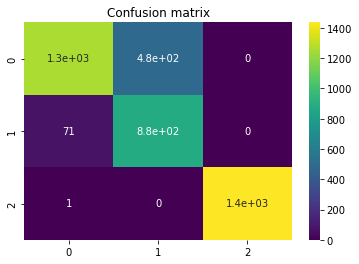

DecisionTreeClassifier
0.789665211062591


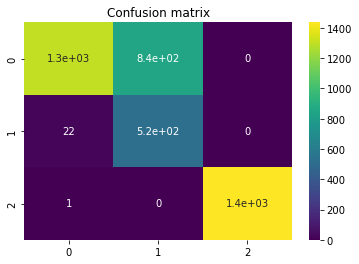

KNeighborsClassifier
0.7564289180009705


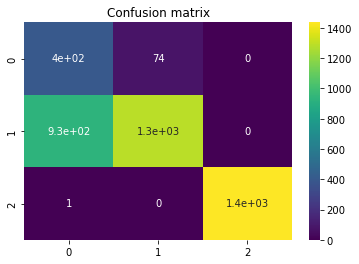

SVC
0.8670548277535177


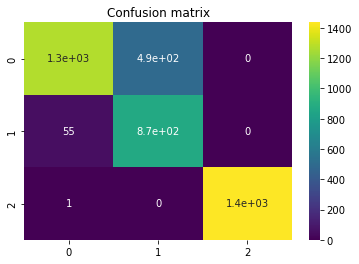

RandomForestClassifier
0.8651140223192625


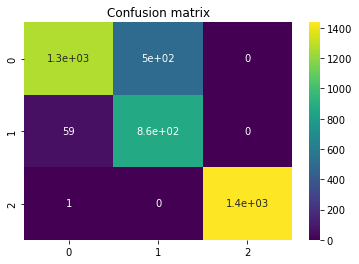

In [12]:
print('LogisticRegression')
predictions(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

print('DecisionTreeClassifier')
predictions(DecisionTreeClassifier(random_state=42, max_depth=3), X_train, y_train, X_test, y_test)

print('KNeighborsClassifier')
predictions(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

print('SVC')
predictions(SVC(random_state=2207, probability=True), X_train, y_train, X_test, y_test)

print('RandomForestClassifier')
predictions(RandomForestClassifier(random_state=0), X_train, y_train, X_test, y_test)

**Exercise:** Try to read the sklearn documentation of each model used in this tutorial and adject some of the parameters, e.g., number of iterations. Can you improve the accuracy?

In [13]:
# Your code here

**Exercise:** Try to read the [sklearn documentation](https://scikit-learn.org/stable/modules/multiclass.html) about multi-class classification and try out different models.

In [14]:
# Your code here